In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652692 entries, 0 to 652691
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        652692 non-null  float64
 1   lng        652692 non-null  float64
 2   desc       652692 non-null  object 
 3   zip        573727 non-null  float64
 4   title      652692 non-null  object 
 5   timeStamp  652692 non-null  object 
 6   twp        652409 non-null  object 
 7   addr       652692 non-null  object 
 8   e          652692 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Basic Question

## What are the Top 5 zip codes ?

In [8]:
df['zip'].value_counts().head(5)

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

## What are the top 5 townships(twp) for 911 calls ?

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    54686
ABINGTON        39302
NORRISTOWN      36931
UPPER MERION    35412
CHELTENHAM      30044
Name: twp, dtype: int64

## Take a look at the 'title' column, how many unique title codes are there ?

In [10]:
len(df['title'].unique())

#or

df['title'].nunique()

148

## Add a new column called 'Reason' where the data will be reason for call only. E.g. EMS: BACK PAINS/INJURY will give value 'EMS'

In [11]:
x = df['title'].iloc[0]

In [12]:
x.split(':')[0]

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

## What was the main reason for calling 911. Answer by using newly added column

In [15]:
df['Reason'].value_counts().head()

EMS        326850
Traffic    227045
Fire        98797
Name: Reason, dtype: int64

## Use Seaborn to create a countplot of 911 calls by Reason

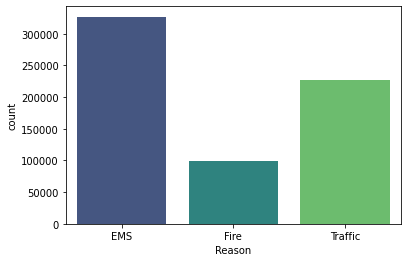

In [16]:
sns.countplot(x='Reason',data=df,palette='viridis')

## What is the datatype of the objects in the timeStamp column ?

In [17]:
type(df['timeStamp'].iloc[0])

str

## Change these timeStamp to DateTime objects

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [19]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# Now we can grab data directly by

time = df['timeStamp'].iloc[0]
time.hour

17

In [21]:
time

Timestamp('2015-12-10 17:10:52')

In [22]:
time.year

2015

In [23]:
time.dayofweek

3

In [24]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
652687    11
652688    11
652689    11
652690    11
652691    11
Name: Hour, Length: 652692, dtype: int64

In [25]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


## Use .map() method to map day of week from int to str

    dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat',6:'Sun' }

In [27]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat',6:'Sun' }

In [28]:
df['Day of week'] = df['Day of week'].map(dmap)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


## Use seaborn to plot countplot of Day of week where hue will be Reason column

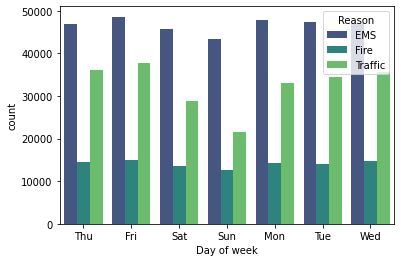

In [30]:
sns.countplot(x='Day of week', data=df,hue='Reason',palette='viridis')

## Do the same where x will be Month

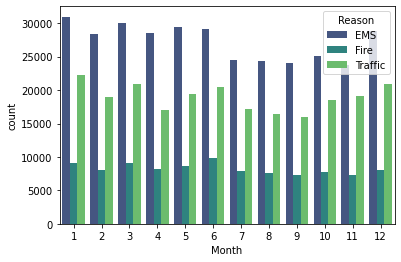

In [31]:
sns.countplot(x='Month', data=df,hue='Reason',palette='viridis')

### Create a groupby object byMonth, where data grouping will be done by Month column of DataFrame. Use count() for aggregation, use the head() method on this returend dataframe

In [34]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


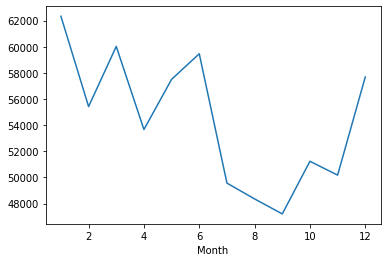

In [35]:
byMonth['lat'].plot()

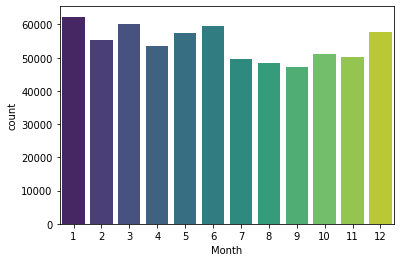

In [36]:
sns.countplot(x='Month',data=df,palette='viridis')

### Crate a lmplot on the number of calls per month. Keep in mind that you need to reset the index to a column

In [39]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,59465,59465,59465,52099,59465,59465,59437,59465,59465,59465,59465,59465
6,7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


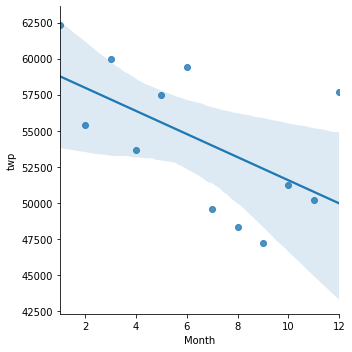

In [40]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

### create a column date from the timestamp column. You will need to use apply along with .date() method.

In [42]:
t = df['timeStamp'].iloc[0]

In [43]:
t

Timestamp('2015-12-10 17:10:52')

In [44]:
t.date()

datetime.date(2015, 12, 10)

In [45]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date() ) 

In [46]:
df['Date'].ilo

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
652687    2020-06-29
652688    2020-06-29
652689    2020-06-29
652690    2020-06-29
652691    2020-06-29
Name: Date, Length: 652692, dtype: object